# Homework Data Visualization

- Nama: Agi Rahmawandi
- Cita-cita semasa kecil: jadi Peter Parker

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# please import as much as you need

In [2]:
# read your data

df = pd.read_csv('telco_customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Normal

## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint: Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

,PaymentMethod,MonthlyCharges
2,Electronic check,76.255814
0,Bank transfer (automatic),67.192649
1,Credit card (automatic),66.512385
3,Mailed check,43.917060


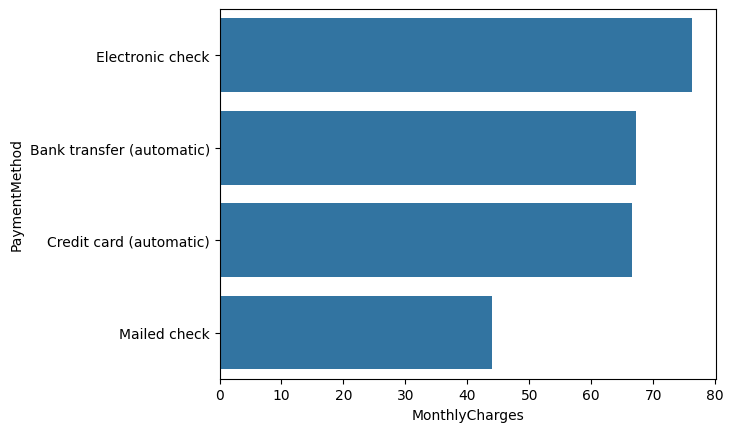

In [8]:
df_pay = (df.groupby('PaymentMethod', as_index=False)
          ['MonthlyCharges'].mean()
          .sort_values('MonthlyCharges', ascending=False))

#plot
sns.barplot(x='MonthlyCharges', y='PaymentMethod',data=df_pay)
# plt.xlabel('Rata-rata Monthly Charges')
# plt.ylabel('Metode Pembayaran')

df_pay

Jadi, dari plot di atas, dapat disimpulkan bahwa metode pembayaran electronic check memiliki rata-rata monthly charges terbesar **76.2** , dan yang paling sedikit adalah metode pembayaran dengng Mailed check sebesar **44.9**

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan

Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

,tenure_group,customerID
0,low_tenure,2878
2,high_tenure,2757
1,medium_tenure,1408


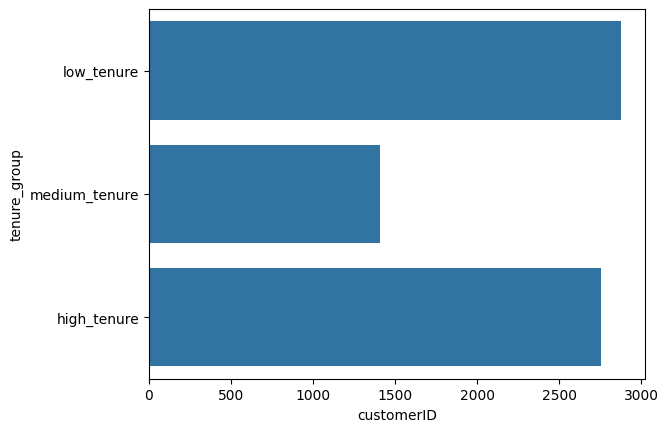

In [4]:
# Definisi tepian (bins) dan label
batas  = [0, 21, 41, np.inf]      # [0,20)  [21,40)  [41,∞)
label  = ["low_tenure", "medium_tenure", "high_tenure"]

df["tenure_group"] = pd.cut(
   df["tenure"],
    bins=batas,
    labels=label,
    right=False,          
    include_lowest=True  
)

#cek hasil kategori
#df_g= df.groupby('tenure_group',observed=False)['tenure'].agg(["count", "min", "max"]).sort_index()

df_tg = (
    df.groupby('tenure_group', observed=False)   
      ['customerID'].nunique() 
      .reset_index()           
      .sort_values('customerID', ascending=False)
)

sns.barplot(data=df_tg, x='customerID', y='tenure_group')
# plt.xlabel('Total Customer')
# plt.ylabel('Metode Pembayaran')
df_tg

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

Jadi, dari plot di atas, kami menyimpulkan bahwa masa berlangganan(tenure) pada kategori low dan high hampir sama, namun pada kategori medium tergolong sedikit.

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?

Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa perhatikan angka rasio, tidak hanya angka absolutnya



In [6]:
df_grp = (
    df.groupby(['SeniorCitizen', 'PhoneService'])
      .agg(TotalCustomer=('customerID', 'nunique'))
      .reset_index()
      .assign(
          Percentage=lambda d: (
              d.groupby('SeniorCitizen')['TotalCustomer']
               .transform(lambda x: (x / x.sum() * 100).round(2))
          ),
            Percentage_total=lambda x: (
              x['TotalCustomer'] / x['TotalCustomer'].sum() * 100
          ).round(2)
      
      )
)

# df_grp = df_grp[df_grp['SeniorCitizen'] == 1]   # filter di sini
print(df_grp)


   SeniorCitizen PhoneService  TotalCustomer  Percentage  Percentage_total
0              0           No            578        9.79              8.21
1              0          Yes           5323       90.21             75.58
2              1           No            104        9.11              1.48
3              1          Yes           1038       90.89             14.74


<Axes: xlabel='SeniorCitizen', ylabel='Percentage'>

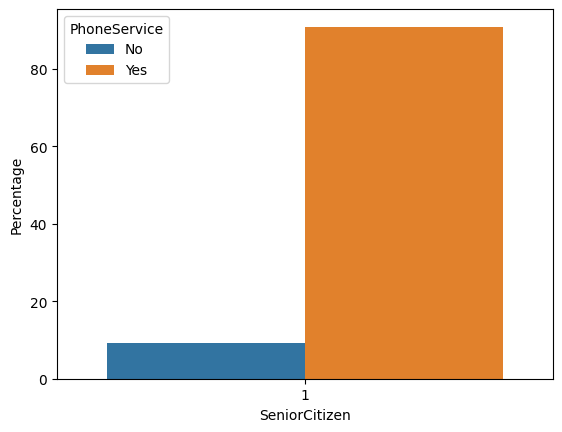

In [13]:
sns.barplot(x='SeniorCitizen',y='Percentage',data=df_grp[df_grp['SeniorCitizen']==1], hue='PhoneService')

Jadi, dari plot di atas, dapat disimpulkan bahwa 91% dari Senior Citizen berlangganan phone service, dan sisanya 9% tidak berlangganan phone service, 

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana Distribusi dari TotalCharge?

Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [45]:
# # your code goes here!

# Hitung nilai kosong/spasi
# print(df['TotalCharges'].value_counts(dropna=False))
# Replace
# df['TotalCharges'] = df['TotalCharges'].replace(['', ' '], np.nan)

df['TotalCharges'] = df['TotalCharges'].astype(float)


mode: 20.2


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

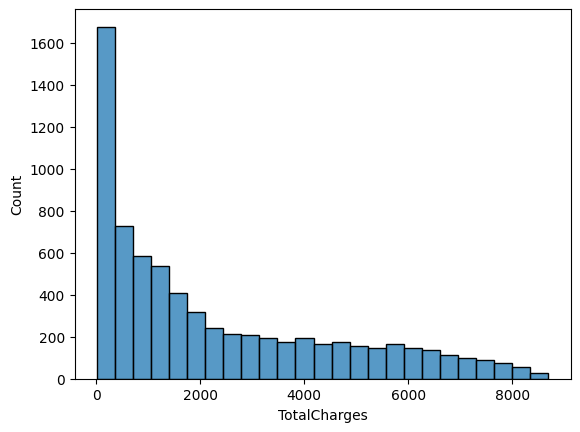

In [67]:
sns.histplot(df['TotalCharges'])

print('mode:',df['TotalCharges'].mode().iloc[0])
df['TotalCharges'].describe()

<Axes: xlabel='TotalCharges'>

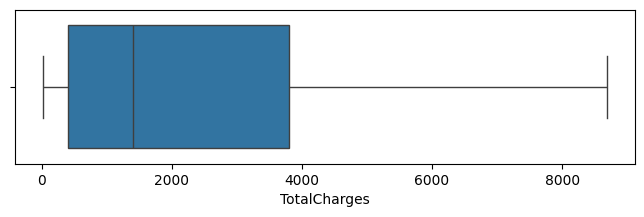

In [ ]:
plt.figure(figsize = (8,2))
sns.boxplot(x='TotalCharges',data = df)


Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Intermediate

## Apakah customer yang memiliki monthly charges yang tinggi cenderung churn?

Hint: dapat ditunjukan melalui distribusi data

In [ ]:
# your code goes here!


Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

## Bagaimana pengaruh memiliki partner & dependents terhadap tingkat churn customer?

Hint: concat partner dan dependents, gunakan parameter 'hue' pada seaborn untuk mempermudah

In [ ]:
# your code goes here!


Jadi, dari plot di atas, dapat disimpulkan bahwa...

$\textbf{Jangan lupa kasih kesimpulan dari visualisasi yang kalian buat! Isi seperti diatas ya}$

# Soal Hard

## Buatlah satu insight dari data telco customer, dan sertakan storyline pada visualisasi tersebut! dengan hanya memanfaatkan atribut PaymentMethod, CustomerID, dan Churn!

In [ ]:
# your code goes here!
